In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import scipy.io as sio

import scipy.stats as stats  # for getting gamma distribution pdf

#Rat_Peak20
#def read_data(filename)
#    mat_contents = sio.loadmat(filename)
#    return mat_contents



def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.9 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')


#ypeak = read_data('Rat_Peak20.mat')

In [2]:
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')

In [3]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 2., 1.]))
plt.plot(xdata, func(xdata, *popt), 'g--', label='fit-with-bounds')


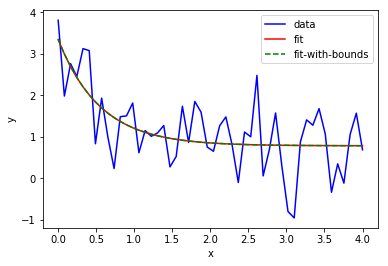

In [4]:
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [100]:
mat_contents = sio.loadmat('Rat_Peak20.mat')
x = mat_contents['Rat_Peak20']
x = np.array(np.squeeze(x[:,:,0,0]))

x = np.reshape(x,30*300)
ind = np.invert(np.isnan(x))
x = x[ind]
x.shape

dt = 2
tmax = 80
n  = 80/dt+1;
rng = np.linspace(0,80,n)



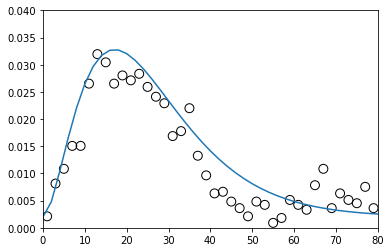

In [122]:
#help(np.histogram)
c, edges = np.histogram(x,bins=rng)
c = c/c.sum()/dt
plt.scatter(edges[0:-1]+dt/2,c, s=80, facecolors='none', edgecolors='k')
y1 = stats.gamma.pdf(rng, a=2.9, scale=9)
plt.plot(rng,y1+0.002)
plt.axis([0,80,0,0.04])
plt.show()

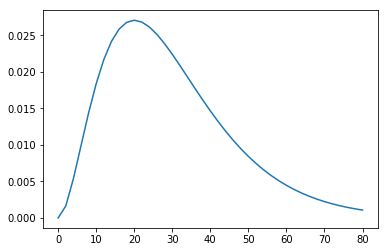